## 1

(a) 求解单位脉冲和单位阶跃响应的脚本如下：

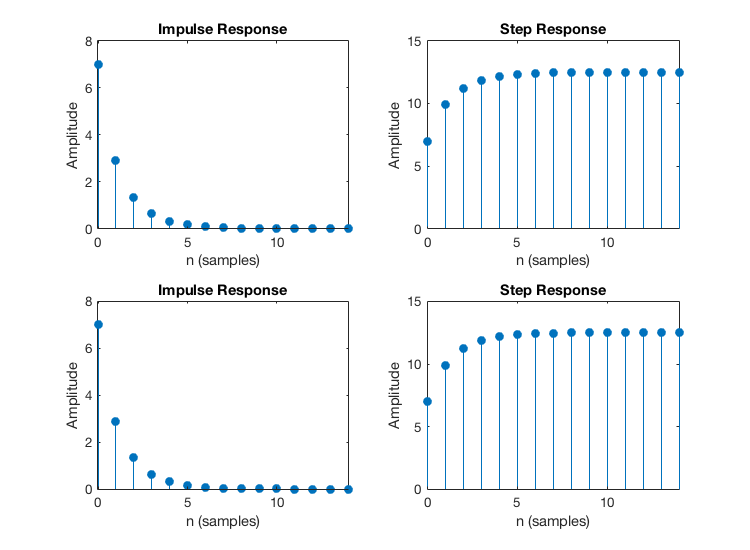

In [2]:
%plot -s 750,550
nf=14;
n=-2:nf;
x1=zeros(size(n)); x1(3)=1; %Impulse function.
x2=zeros(size(n)); x2(3:nf+3)=1; %Step function.
y1=zeros(size(n)); 
y2=y1;
for k=3:nf+3
    y1(k)=7*x1(k)-2*x1(k-1)+0.7*y1(k-1)-0.1*y1(k-2);
    y2(k)=7*x2(k)-2*x2(k-1)+0.7*y2(k-1)-0.1*y2(k-2);
end
subplot(2,2,1); stem(n,y1,'filled'); axis([-0.01,nf,0,8]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Impulse Response');  
subplot(2,2,2); stem(n,y2,'filled'); axis([-0.01,nf,0,15]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Step Response');

% For comparison
a=[1,-0.7,0.1]; b=[7,-2,0];
%subplot(2,2,3); impz(b,a,nf+1);
%subplot(2,2,4); stepz(b,a,nf+1);
y1=[0 0 filter(b,a,[1,zeros(1,nf)])];
y2=[0 0 filter(b,a,ones(1,nf+1))];
subplot(2,2,3); stem(n,y1,'filled'); axis([-0.01,nf,0,8]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Impulse Response');  
subplot(2,2,4); stem(n,y2,'filled'); axis([-0.01,nf,0,15]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Step Response');

可以看到递推得到的结果与`impz`、`stepz`，以及`filter`等函数得到的结果是相同的。

求解系统响应的脚本如下：

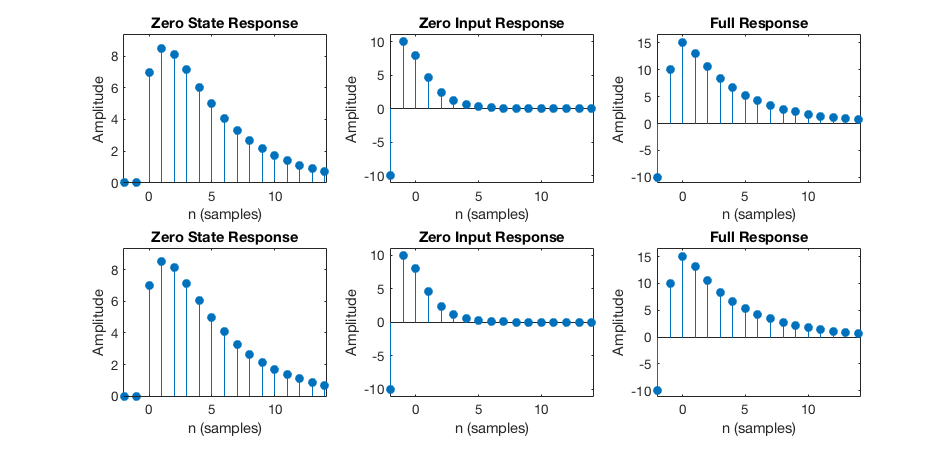

In [3]:
%plot -s 950,450
x(1)=0; x(2)=0; x(3:nf+3)=0.8.^(0:nf); %Input signal.
xz=zeros(size(n)); %Zero input.
yzi=zeros(size(n)); yzs=zeros(size(n)); 
yzi(1)=-10; yzi(2)=10; %Initial states.
for k=3:nf+3
    yzs(k)=7*x(k)-2*x(k-1)+0.7*yzs(k-1)-0.1*yzs(k-2);
    yzi(k)=7*xz(k)-2*xz(k-1)+0.7*yzi(k-1)-0.1*yzi(k-2);
end

subplot(2,3,1); stem(n,yzs,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzs)*1.1,max(yzs)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Zero State Response');  
subplot(2,3,2); stem(n,yzi,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzi)*1.1,max(yzi)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Zero Input Response');
subplot(2,3,3); stem(n,yzi+yzs,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzi+yzs)*1.1,max(yzi+yzs)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Full Response');

% For comparison
a=[1,-0.7,0.1]; b=[7,-2,0];
x1=0.8.^(0:nf); %Input signal.
%z=filtic(b,a,[10,-10]); %Initial conditions
yi=[-10 10];
z=[-a(3)*yi(1)-a(2)*yi(2) -a(3)*yi(2)];
yzs1=[0 0,filter(b,a,x1)];
yzi1=[yi,filter(b,a,zeros(size(x1)),z)];
y=[yi,filter(b,a,x1,z)];

subplot(2,3,4); stem(n,yzs1,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzs)*1.1,max(yzs)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Zero State Response');  
subplot(2,3,5); stem(n,yzi1,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzi)*1.1,max(yzi)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Zero Input Response');
subplot(2,3,6); stem(n,y,'filled'); 
axis([min(n)*1.01,max(n)*1.01,min(yzi+yzs)*1.1,max(yzi+yzs)*1.1]);
xlabel('n (samples)'); ylabel('Amplitude'); 
title('Full Response');

同样，可以看出结果是相同的。

## 2

(a) 将方程

$$y''\left( t \right) + 5y'\left( t \right) + 6y\left( t \right) = 2x'\left( t \right) + 8x\left( t \right)$$

后向差分离散化为

$$\frac{{y\left[ n \right] - 2y\left[ {n - 1} \right] + y\left[ {n - 2} \right]}}{{\Delta {t^2}}} + 5\frac{{y\left[ {n - 1} \right] - y\left[ {n - 2} \right]}}{{\Delta t}} + 6y\left[ {n - 1} \right] = 2\frac{{x\left[ {n - 1} \right] - x\left[ {n - 2} \right]}}{{\Delta t}} + 8x\left[ {n - 1} \right]$$

即

$$y\left[ n \right] + \left( { - 2 + 5\Delta t + 6\Delta {t^2}} \right)y\left[ {n - 1} \right] + \left( {1 - 5\Delta t} \right)y\left[ {n - 2} \right] = \left( {2\Delta t + 8\Delta {t^2}} \right)x\left[ {n - 1} \right] - 2\Delta tx\left[ {n - 2} \right]$$

相应的初始输出值为$y\left[ { - 1} \right] = 5$, $y[ - 2] = y\left[ { - 1} \right] + 4\Delta t$。取$\Delta t=0.02$ s：

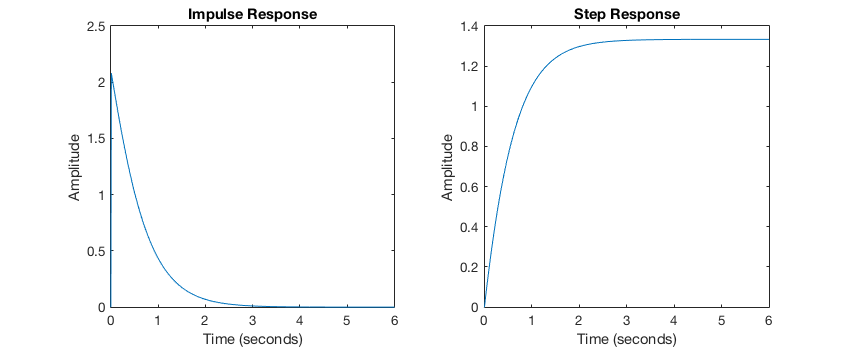

In [3]:
%plot -s 850,350
Ts=1.e-2;
t=0:Ts:6;
a=[1,-2+5*Ts+6*Ts*Ts,1-5*Ts]; 
b=[0,2*Ts+8*Ts*Ts,-2*Ts];

ximp=[0 0 1/Ts zeros(1,length(t)-1)];
xstep=[0 0 ones(size(t))];

yimp=zeros(size(ximp)); ystep=yimp;
for k=3:length(t)+2
    yimp(k)=b(2)*ximp(k-1)+b(3)*ximp(k-2)-a(2)*yimp(k-1)-a(3)*yimp(k-2);
    ystep(k)=b(2)*xstep(k-1)+b(3)*xstep(k-2)-a(2)*ystep(k-1)-a(3)*ystep(k-2);
end
yimp(1:2)=[]; ystep(1:2)=[]; 

subplot(1,2,1); plot(t,yimp);
xlabel('Time (seconds)'); ylabel('Amplitude'); 
title('Impulse Response');
subplot(1,2,2); plot(t,ystep);
xlabel('Time (seconds)'); ylabel('Amplitude'); 
title('Step Response');

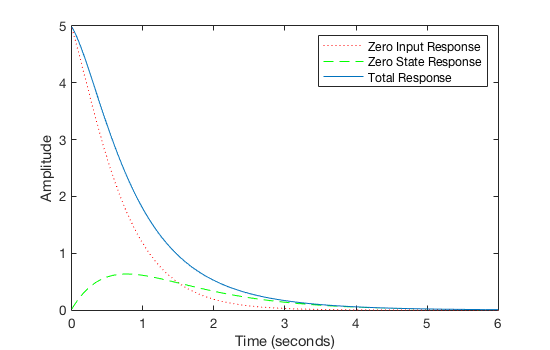

In [5]:
%plot -s 550,350
x=[0 0 exp(-t)]; %Input signal.
yzi=[5+4*Ts 5 zeros(size(t))]; yzs=[0 0 zeros(size(t))]; 
for k=3:length(t)+2
    yzs(k)=b(2)*x(k)+b(3)*x(k-1)-a(2)*yzs(k-1)-a(3)*yzs(k-2);
    yzi(k)=-a(2)*yzi(k-1)-a(3)*yzi(k-2);
end
yzs(1:2)=[]; yzi(1:2)=[];
y=yzs+yzi;

plot(t,yzi,'r:',t,yzs,'g--',t,y);
xlabel('Time (seconds)');  ylabel('Amplitude');
legend('Zero Input Response','Zero State Response','Total Response');

以下为用`filter`函数得出的结果，可以看出结果一致：

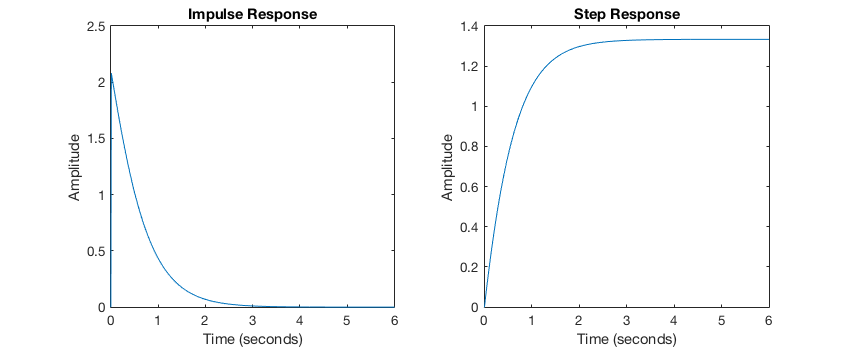

In [6]:
%plot -s 850,350
yimp=filter(b,a,[1/Ts zeros(1,length(t)-1)]);
ystep=filter(b,a,ones(size(t)));

subplot(1,2,1); plot(t,yimp);
xlabel('Time (seconds)'); ylabel('Amplitude'); 
title('Impulse Response');
subplot(1,2,2); plot(t,ystep);
xlabel('Time (seconds)'); ylabel('Amplitude'); 
title('Step Response');


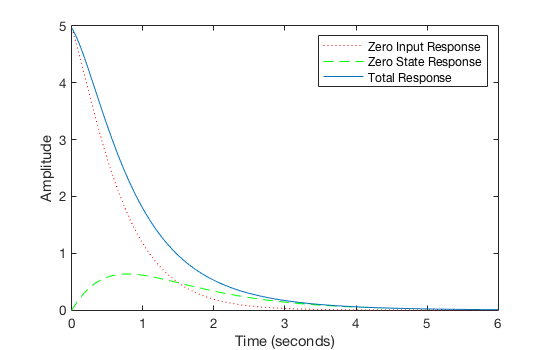

In [8]:
%plot -s 550,350
%z=filtic(b,a,[5,5+4*dt]); %Initial conditions
yi=[5+4*Ts 5];
z=[-a(3)*yi(1)-a(2)*yi(2) -a(3)*yi(2)];
x=exp(-t); 
yzs=filter(b,a,x);
yzi=filter(b,a,zeros(size(t)),z);
y=filter(b,a,x,z);

plot(t,yzi,'r:',t,yzs,'g--',t,y);
xlabel('Time (seconds)');  ylabel('Amplitude');
legend('Zero Input Response','Zero State Response','Total Response');

用工具箱函数得出的单位冲激和单位阶跃响应：

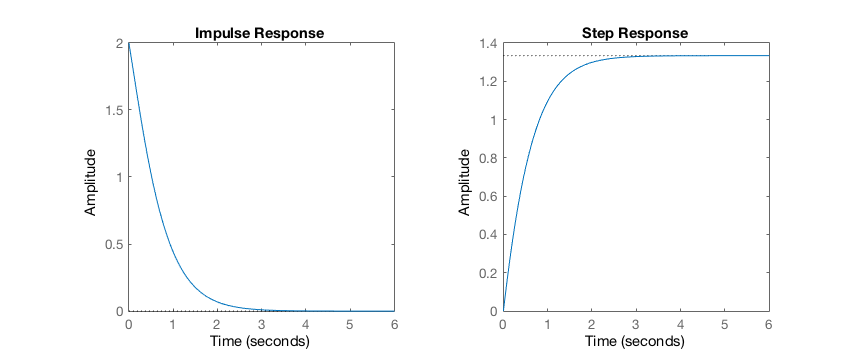

In [9]:
%plot -s 850,350
a=[1 5 6]; b=[2 8];
sys=tf(b,a);
subplot(1,2,1); impulse(sys,t);
subplot(1,2,2); step(sys,t);

用`lsim`函数得出的结果，这里需要先求出系统状态变量的初始值，分别为${\omega _1}\left( {{0_ - }} \right) = 7/2$, ${\omega _2}\left( {{0_ - }} \right) = -1/4$：

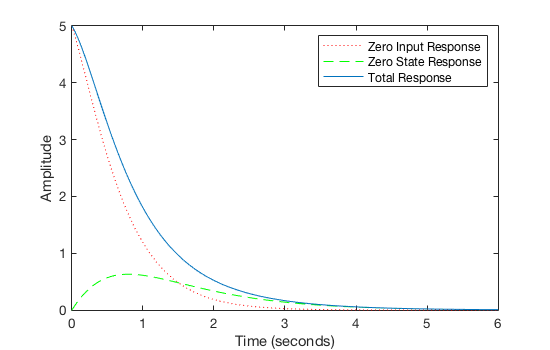

In [10]:
%plot -s 550,350
[A,B,C,D]=tf2ss(b,a);
sys=ss(A,B,C,D);
X0=[3.5 -0.25];
x=exp(-t);
yzi=lsim(sys,zeros(1,length(t)),t,X0);
yzs=lsim(sys,x,t);
y=lsim(sys,x,t,X0);

plot(t,yzi,'r:',t,yzs,'g--',t,y);
xlabel('Time (seconds)');  ylabel('Amplitude');
legend('Zero Input Response','Zero State Response','Total Response');

## 3

用`lsim`函数可以很方便地计算系统对任意输入信号的响应。

(a) 正弦信号：

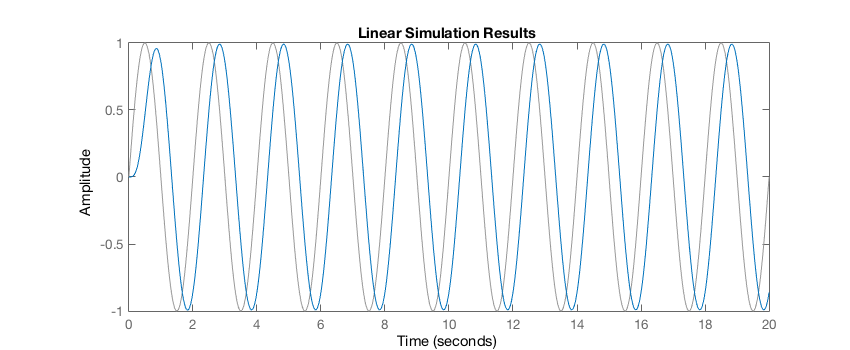

In [12]:
%plot -s 850,350
wc=2*pi; fc=1;
sys=tf(wc*wc*wc,[1 2*wc 2*wc*wc wc*wc*wc]);

f=fc/2; t=linspace(0,10/f,600);
lsim(sys,sin(2*pi*f*t),t);

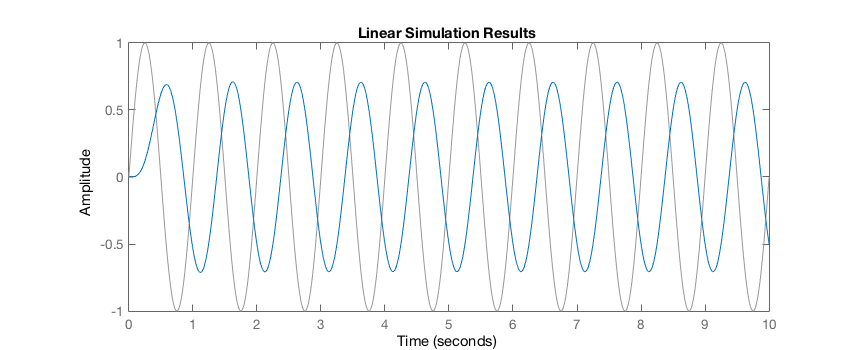

In [13]:
f=fc; t=linspace(0,10/f,600);
lsim(sys,sin(2*pi*f*t),t);

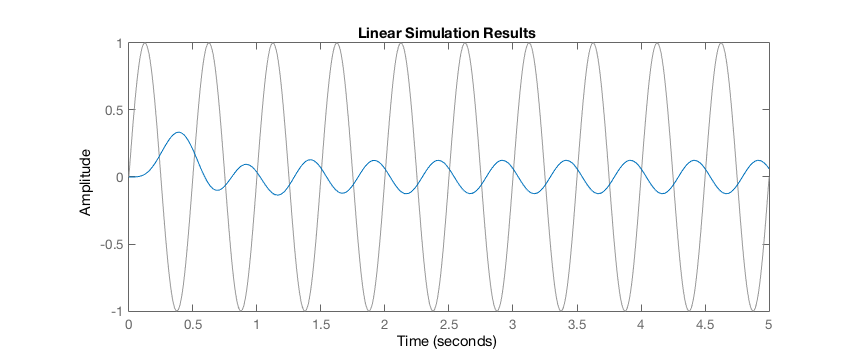

In [14]:
f=fc*2; t=linspace(0,10/f,600);
lsim(sys,sin(2*pi*f*t),t);

(b) 周期方波信号

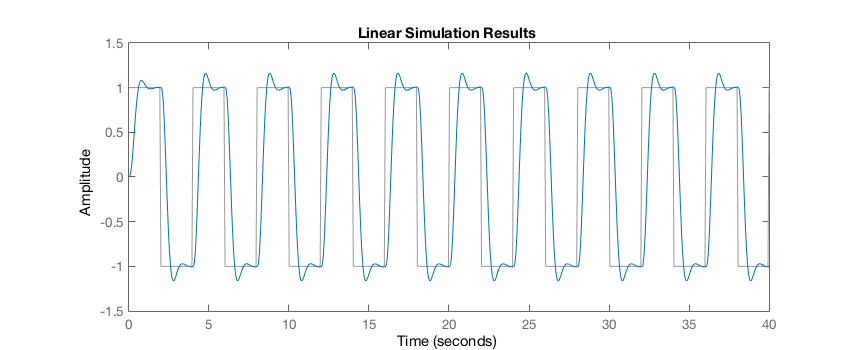

In [15]:
f=fc/4; t=linspace(0,10/f,600);
lsim(sys,square(2*pi*f*t),t);

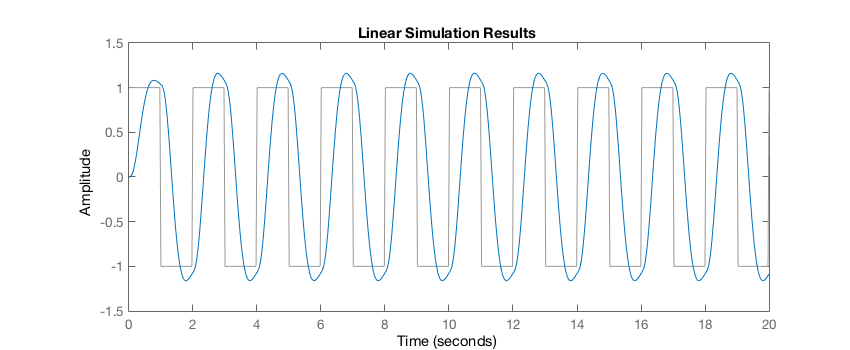

In [16]:
f=fc/2; t=linspace(0,10/f,600);
lsim(sys,square(2*pi*f*t),t);

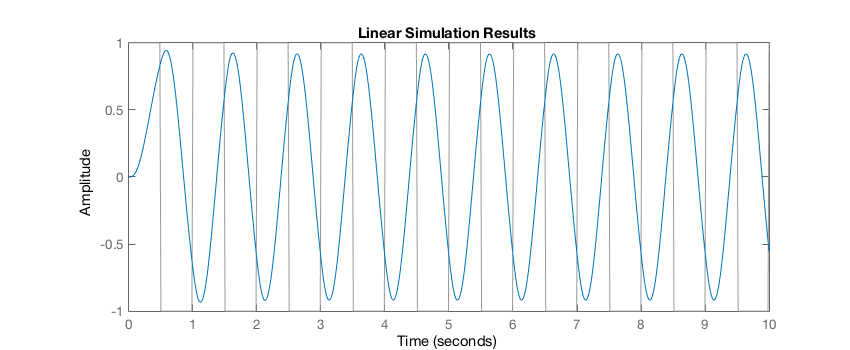

In [17]:
f=fc; t=linspace(0,10/f,600);
lsim(sys,square(2*pi*f*t),t);

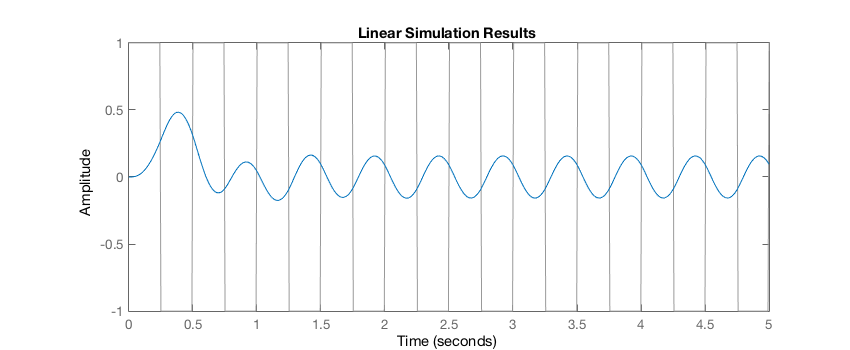

In [18]:
f=2*fc; t=linspace(0,10/f,600);
lsim(sys,square(2*pi*f*t),t);